In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
print("Training Data:")
print(X_train)
print("Testing Data:")
print(X_test)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = model.score(X_test_scaled, y_test)
print("Model Accuracy:", accuracy)
print("Learned Model Weights (coef):")
print(model.coef_)
print("Learned Model Bias (intercept):")
print(model.intercept_)

Training Data:
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.

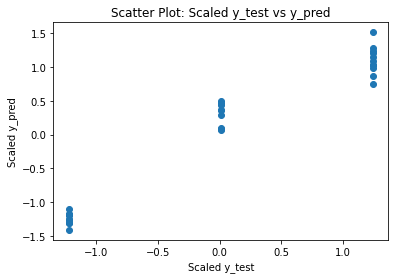

Training Score (Scaled Data): 0.9254199044989622
Testing Score (Scaled Data): 0.9468960016420045
Mean Squared Error (Scaled): 0.056381331308668334

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
data = load_iris()
X = data.data
y = data.target.reshape(-1, 1) # reshape for scaler
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model.predict(X_test_scaled)
plt.figure(figsize=(6,4))
plt.scatter(y_test_scaled, y_pred_scaled)
plt.xlabel("Scaled y_test")
plt.ylabel("Scaled y_pred")
plt.title("Scatter Plot: Scaled y_test vs y_pred")
plt.show()
train_score = model.score(X_train_scaled, y_train_scaled)
test_score = model.score(X_test_scaled, y_test_scaled)

print("Training Score (Scaled Data):", train_score)
print("Testing Score (Scaled Data):", test_score)
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
print("Mean Squared Error (Scaled):", mse)
y_pred_unscaled = scaler_y.inverse_transform(y_pred_scaled)
y_pred_class =np.rint(y_pred_unscaled).astype(int).flatten()
y_test_class = y_test.flatten()
cm = confusion_matrix(y_test_class, y_pred_class)
print("\nConfusion Matrix:")
print(cm)
report = classification_report(y_test_class, y_pred_class)
print("\nClassification Report:")
print(report)